## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([6, 6, 11, 17, 16, 20, 23, 23, 29, 33, 39])

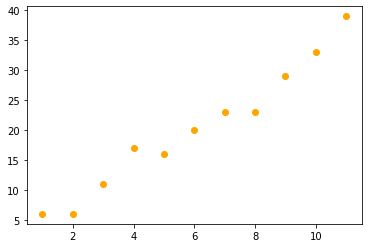

In [3]:
plt.scatter(x = x, y = y, color='orange')

In [4]:
class LinearRegression():
    ''' Class that implemnets Simple Linear Regression '''
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def fit(self, X, y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        
        SSxy = np.sum(np.multiply(X, y)) - len(x) * mean_x * mean_y
        SSxx = np.sum(np.multiply(X, x)) - len(x) * mean_x * mean_x
        
        self.b1 = SSxy / SSxx
        self.b0 = mean_y - self.b1 * mean_x
    
    def predict(self, input_data):
        return self.b0 + self.b1 * input_data

In [5]:
model = LinearRegression()
model.fit(x, y)

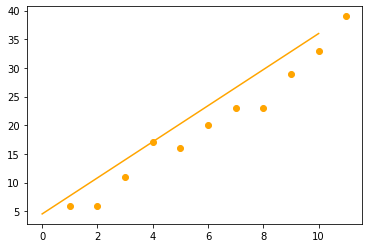

In [6]:
predictions = model.predict(x)
plt.scatter(x = x, y = y, color='orange')
plt.plot(predictions, color='orange')
plt.show()

## Multiple LInear Regression

In [7]:
data = pd.read_csv('./data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
class MultipleLinearRegression():
    ''' Class that implements Multiple Linear Regression '''
    def __init__(self):
        self.b = 0
        self.w = []
        
    def fit(self, X, y):
        # If there is only one feature we need to reshape input.
        if len(X.shape) == 1:
            X.reshape(-1, 1)
            
        # Add 'ones' to model coefficient b in data.
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        X = np.concatenate((ones, X), 1)
        
        coeficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        self.b = coeficients[0]
        self.w = coeficients[1:]

    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self.b

            for xi, wi in zip(x, self.w):
                prediction += wi * xi
            
            predictions.append(prediction)
            
        return predictions

In [9]:
X = data.drop('medv', axis=1).values
y = data['medv'].values

In [10]:
model = MultipleLinearRegression()
model.fit(X, y)

In [11]:
model.b

36.459488385099654

In [12]:
model.w

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [13]:
predictions = model.predict(X)

In [14]:
pd.DataFrame({
    'Actual Value': y,
    'Vanilla Model Prediction': predictions,
})

,Actual Value,Vanilla Model Prediction
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
...,...,...
501,22.4,23.533341
502,20.6,22.375719
503,23.9,27.627426
504,22.0,26.127967


## Using SciKit Learn

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Re-Train implementation
model.fit(X_train, y_train)

# Use and train SciKit Learn Linear Regression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Make predictions
sk_predictions = sk_model.predict(X_test)
predictions = model.predict(X_test)

# Compare
pd.DataFrame({
    'Actual Value': y_test,
    'Vanilla Model Prediction': predictions,
    'SciKit Model Prediction': sk_predictions,
})

,Actual Value,Vanilla Model Prediction,SciKit Model Prediction
0,20.5,20.535939,20.535939
1,5.6,11.400370,11.400370
2,13.4,13.024932,13.024932
3,12.6,18.448961,18.448961
4,21.2,22.634241,22.634241
...,...,...,...
97,25.0,25.216456,25.216456
98,19.5,16.798470,16.798470
99,19.9,20.075704,20.075704
100,15.4,14.467506,14.467506


In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [19]:
sgd_pipeline = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, alpha=0.1))
sgd_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.1, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [34]:
sgd_predictions = sgd_pipeline.predict(X_test)

pd.DataFrame({
    'Actual Value': y_test,
    'Vanilla Model Prediction': predictions,
    'SciKit Model Prediction': sk_predictions,
    'SGD Model Prediction': sgd_predictions,
})

,Actual Value,Vanilla Model Prediction,SciKit Model Prediction,SGD Model Prediction
0,20.5,20.535939,20.535939,19.214685
1,5.6,11.400370,11.400370,10.354499
2,13.4,13.024932,13.024932,17.140676
3,12.6,18.448961,18.448961,9.019113
4,21.2,22.634241,22.634241,29.144803
...,...,...,...,...
97,25.0,25.216456,25.216456,20.362897
98,19.5,16.798470,16.798470,22.423240
99,19.9,20.075704,20.075704,20.118347
100,15.4,14.467506,14.467506,-2.998486


## Using TensorFlow

In [21]:
import tensorflow as tf

In [22]:
class TensorFlowLinearRegression:
    ''' Class that implemnets Multiple Linear Regression with TensorFlow'''
    def __init__(self, num_of_features):
        self.var = 0.
            
        self.w = tf.Variable(1., shape=tf.TensorShape(None))
        self.w.assign([self.var] * num_of_features)
        
        self.b = tf.Variable(self.var)
        self.learning_rate = 0.000001
    
    def _mse(self, true, predicted):
        return tf.reduce_mean(tf.square(true-predicted))
       
    def fit(self, X, y, epochs=5):
        
        if len(X.shape)==1:
            X=tf.reshape(X,[X.shape[0],1])
        
        for i in range(epochs):
            with tf.GradientTape(persistent=True) as g:
                loss = self._mse(y, self.predict(X))
                
                if i % 1000 == 0:
                    print(f'Epoch: {i} - Loss: {loss}')

                dw = g.gradient(loss, self.w)
                db = g.gradient(loss, self.b)

                self.w.assign_sub(self.learning_rate * dw)
                self.b.assign_sub(self.learning_rate * db)
            
    def predict(self, X):
        return tf.reduce_sum(self.w * X, 1) + self.b

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

tf_model = TensorFlowLinearRegression(X_train.shape[1])
tf_model.fit(X_train, y_train, 10000)


Epoch: 0 - Loss: 608.6907958984375
Epoch: 1000 - Loss: 74.81473541259766
Epoch: 2000 - Loss: 71.41828155517578
Epoch: 3000 - Loss: 69.0165786743164
Epoch: 4000 - Loss: 67.0320053100586
Epoch: 5000 - Loss: 65.30267333984375
Epoch: 6000 - Loss: 63.76752471923828
Epoch: 7000 - Loss: 62.39451217651367
Epoch: 8000 - Loss: 61.16150665283203
Epoch: 9000 - Loss: 60.05082321166992


In [24]:

tf_predictions = tf_model.predict(X_test)
pd.DataFrame({
    'Actual Value': y_test,
    'Vanilla Model Prediction': predictions,
    'TensorFlow Prediction': tf_predictions,
})

,Actual Value,Vanilla Model Prediction,TensorFlow Prediction
0,20.5,20.535939,20.263395
1,5.6,11.400370,18.881317
2,13.4,13.024932,1.071071
3,12.6,18.448961,23.273224
4,21.2,22.634241,21.131357
...,...,...,...
97,25.0,25.216456,16.815962
98,19.5,16.798470,22.625612
99,19.9,20.075704,23.244699
100,15.4,14.467506,18.252172


## Using PyTorch

In [25]:
import torch

In [26]:
class PyTorchLinearRegression:
    ''' Class that implemnets Multiple Linear Regression with PyTorch'''
    def __init__(self, num_of_features):
        self.w = torch.zeros(num_of_features, requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.learning_rate = 0.000001
    
    def _model(self, X):
        return X @ self.w.t() + self.b
    
    def _mse(self, pred, real):
        difference = pred - real
        return torch.sum(difference * difference) / difference.numel()
    
    def fit(self, X, y, epochs):
        X = torch.from_numpy(X).float()
        y = torch.from_numpy(y).float()
        
        for i in range(epochs):
            predictions = self._model(X)
            loss = self._mse(predictions, y)

            if i % 1000 == 0:
                print(f'Epoch: {i} - Loss: {loss}')

            loss.backward()
            with torch.no_grad():
                self.w -= self.w.grad * self.learning_rate
                self.b -= self.b.grad * self.learning_rate
                self.w.grad.zero_()
                self.b.grad.zero_()
    
    def predict(self, X):
        X = torch.from_numpy(X).float()
        return self._model(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

torch_model = PyTorchLinearRegression(X_train.shape[1])
torch_model.fit(X_train, y_train, 10000)

torch_predictions = torch_model.predict(X_test)
torch_predictions = torch_predictions.detach().numpy()
pd.DataFrame({
    'Actual Value': y_test,
    'Vanilla Model Prediction': predictions,
    'Torch Prediction': torch_predictions,
})

Epoch: 0 - Loss: 608.6907958984375
Epoch: 1000 - Loss: 74.8147201538086
Epoch: 2000 - Loss: 71.41828918457031
Epoch: 3000 - Loss: 69.01657104492188
Epoch: 4000 - Loss: 67.03199768066406
Epoch: 5000 - Loss: 65.30267333984375
Epoch: 6000 - Loss: 63.767539978027344
Epoch: 7000 - Loss: 62.3945198059082
Epoch: 8000 - Loss: 61.1615104675293
Epoch: 9000 - Loss: 60.050819396972656


,Actual Value,Vanilla Model Prediction,Torch Prediction
0,20.5,20.535939,20.263393
1,5.6,11.400370,18.881317
2,13.4,13.024932,1.071071
3,12.6,18.448961,23.273228
4,21.2,22.634241,21.131359
...,...,...,...
97,25.0,25.216456,16.815962
98,19.5,16.798470,22.625612
99,19.9,20.075704,23.244698
100,15.4,14.467506,18.252171
